<a href="https://colab.research.google.com/github/maria56788/Vaccination-database-project/blob/master/432Project_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing     # For StandardScaler
import sklearn.linear_model      # For LogisticRegression
import sklearn.neural_network    # For MLPClassifier
import torch
import warnings
import os
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)  # Annoying
np.set_printoptions(precision=3, suppress=True)  # Print as 0.001 instead of 9.876e-4

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
%cd ..

%cd /content/drive/My Drive/Colorectal Cancer1
import shutil

# Set the source folder and destination folder paths
source_folder = '/content/drive/My Drive/Colorectal Cancer1'
# path to your dataset
destination_folder = '/content/dataset2'

import shutil

# Remove the existing folder if it exists
if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)

# Copy the dataset to the destination folder
shutil.copytree(source_folder, destination_folder)





/
/content/drive/My Drive/Colorectal Cancer1


'/content/dataset2'

In [6]:

%cd /content/dataset2


# List files in the destination folder
os.listdir(destination_folder)





/content/dataset2


['NORM', 'MUS', 'STR']

In [7]:
# Check the number of .tif files and missing data
expected_count = 6000  # Replace with the expected count

# List all .tif files in the dataset directory
all_tif_files = []
for root, dirs, files in os.walk(destination_folder):
    tif_files = [file for file in files if file.endswith('.tif')]
    all_tif_files.extend(tif_files)

unique_tif_files = list(set(all_tif_files))

# Remove Tiff duplicates in Dataset 1
filtered_tif_files = [file for file in unique_tif_files if "(1)" not in file and "(2)" not in file]


# Calculate the total count of .tif files after removing duplicates
total_count = len(filtered_tif_files)


# Print the results
print(f"Total unique .tif images found: {total_count}")
print(f"Expected count: {expected_count}")
print(f"Missing data: {expected_count - total_count} files are missing.")


Total unique .tif images found: 6000
Expected count: 6000
Missing data: 0 files are missing.


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms

destination_folder = '/content/dataset2'
num_images_to_inspect = 6000

# List all image files in the dataset directory
image_paths = []
for root, dirs, files in os.walk(destination_folder):
    for file in files:
        image_paths.append(os.path.join(root, file))

# Define mean and std values for image normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]


In [9]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot
from matplotlib import image
import time

In [15]:
def load_data(path, test_split,batch_size,input_size):
   transform_dict = {
      'scr': transforms.Compose(
      [ transforms.Resize(input_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
      ])}
   data = datasets.ImageFolder(root=path, transform=transform_dict['scr'])

   dataset_size = len(data)
   test_size = int(dataset_size * test_split)
   train_size = dataset_size - test_size

   train_dataset, test_dataset = td.random_split(data, [train_size, test_size])
   train_loader = td.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
   test_loader = td.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)
   return train_loader, test_loader

In [16]:
path = destination_folder
test_split = 0.3
batch_size = 100
input_size = (224, 224)


train_loader, test_loader = load_data(path, test_split, batch_size, input_size)



Batch Shape: torch.Size([100, 3, 224, 224])


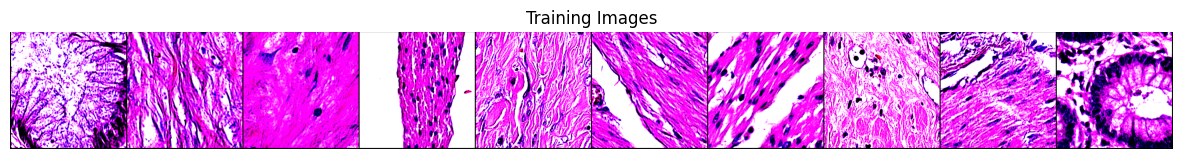

Batch Shape: torch.Size([100, 3, 224, 224])


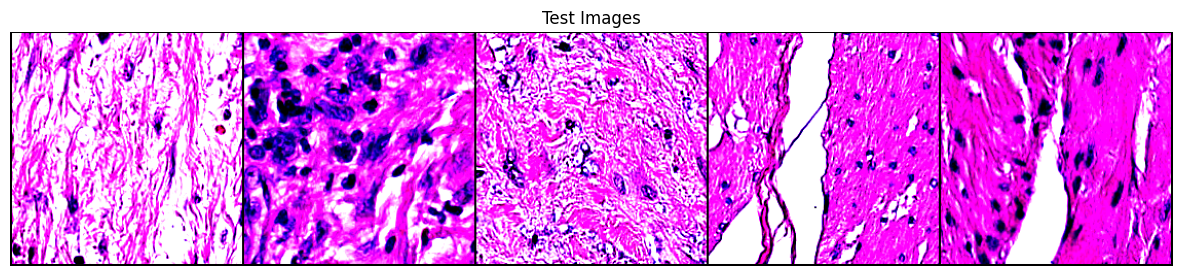

In [17]:
import matplotlib.pyplot as plt
import torchvision

# Assuming train_loader is already defined

# Function to display a subset of images in a grid
def show_images(images, title, num_images=10):

    grid = torchvision.utils.make_grid(images[:num_images], nrow=num_images)

    grid = grid.permute(1, 2, 0)
    grid = grid.numpy()
    plt.figure(figsize=(15, 15))
    plt.imshow(grid)
    plt.title(title)
    plt.axis('off')
    plt.show()


# Iterate through one batch from the train_loader
for inputs, labels in train_loader:
    print(f"Batch Shape: {inputs.shape}")
    show_images(inputs, 'Training Images', num_images=10)
    break

# Iterate through one batch from the test_loader
for inputs, labels in test_loader:
    print(f"Batch Shape: {inputs.shape}")
    show_images(inputs, 'Test Images', num_images=5)
    break





In [18]:

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, models  # Add this import statement
from sklearn.manifold import TSNE
import torch.nn as nn
import torch.optim as optim




device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 3
print(device)


# Print the number of samples in training and testing sets

num_batches = len(train_loader)
print(f"Number of batches in train_loader: {num_batches}")

total_train_samples = num_batches * batch_size
print(f"Total number of samples in the training set: {total_train_samples}")

num__test_batches = len(test_loader)
print(f"Number of batches in train_loader: {num_batches}")

total_test_samples = num__test_batches * batch_size
print(f"Total number of samples in the training set: {total_test_samples}")





cuda
Number of batches in train_loader: 44
Total number of samples in the training set: 4400
Number of batches in train_loader: 44
Total number of samples in the training set: 1900


In [19]:

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, models  # Add this import statement
from sklearn.manifold import TSNE
import torch.nn as nn
import torch.optim as optim




# # Define ResNet-18 architecture
# class CustomResNet18(nn.Module):
#     def __init__(self):
#         super(CustomResNet18, self).__init__()
#         self.resnet18 = resnet18(pretrained=False) #not pretrained from scratch
#         self.resnet18.fc = nn.Linear(512, num_classes)  # Change the output layer to match the number of classes

#     def forward(self, x):
#         return self.resnet18(x)

# Define ResNet-18 architecture
class CustomResNet18(nn.Module):
    def __init__(self):
        super(CustomResNet18, self).__init__()
        self.resnet18 = resnet18(weights=None)  # Use weights=None instead of pretrained=False
        self.resnet18.fc = nn.Linear(512, num_classes)  # Change the output layer to match the number of classes

    def forward(self, x):
        return self.resnet18(x)


# Instantiate the model, loss function, and optimizer
#num_classes = len(image_paths)  # Assuming each image represents a different class
# model = CustomResNet18().to(device)
# #model = model.t

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

model = models.resnet18(pretrained=True)
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

class_to_index = {"MUS": 0, "NORM": 1, "STR": 2}


# Training the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for data in train_loader:
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')





Epoch [1/10], Loss: 1.2178
Epoch [2/10], Loss: 1.6381
Epoch [3/10], Loss: 0.2283
Epoch [4/10], Loss: 0.0912
Epoch [5/10], Loss: 0.8151
Epoch [6/10], Loss: 1.0576
Epoch [7/10], Loss: 2.1746
Epoch [8/10], Loss: 0.0081
Epoch [9/10], Loss: 0.7840
Epoch [10/10], Loss: 0.0160


Embedded Features Shape: (1845, 2)
Unique True Labels: [0 1 2]


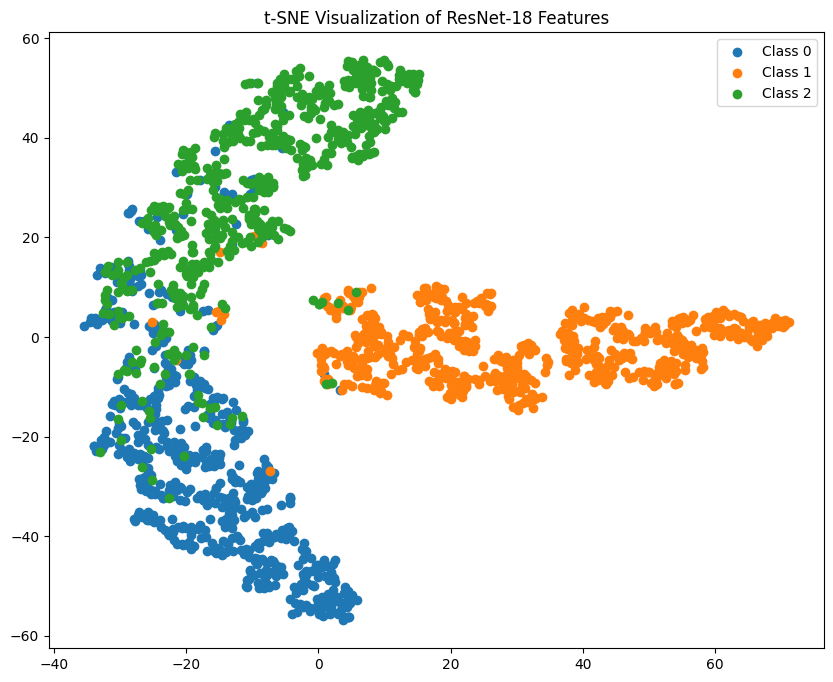

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, models  # Add this import statement
from sklearn.manifold import TSNE
import torch.nn as nn
import torch.optim as optim

# Evaluate using t-SNE
model.eval()

# Extract feature vectors for t-SNE
feature_vectors = []
true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        feature_vectors.append(outputs.cpu().numpy())
        true_labels.append(labels.cpu().numpy())


# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(np.vstack(feature_vectors))

print("Embedded Features Shape:", embedded_features.shape)


flat_true_labels = np.concatenate(true_labels)


# Check for any NaN or infinite values in the embedded features
if np.isnan(embedded_features).any() or np.isinf(embedded_features).any():
    print("NaN or infinite values found in embedded features.")

# Plot the t-SNE embeddings
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    indices = flat_true_labels == i
    plt.scatter(embedded_features[indices, 0], embedded_features[indices, 1], label=f'Class {i}')

plt.title('t-SNE Visualization of Task 1')
plt.legend()
plt.show()


#gpu setting colab